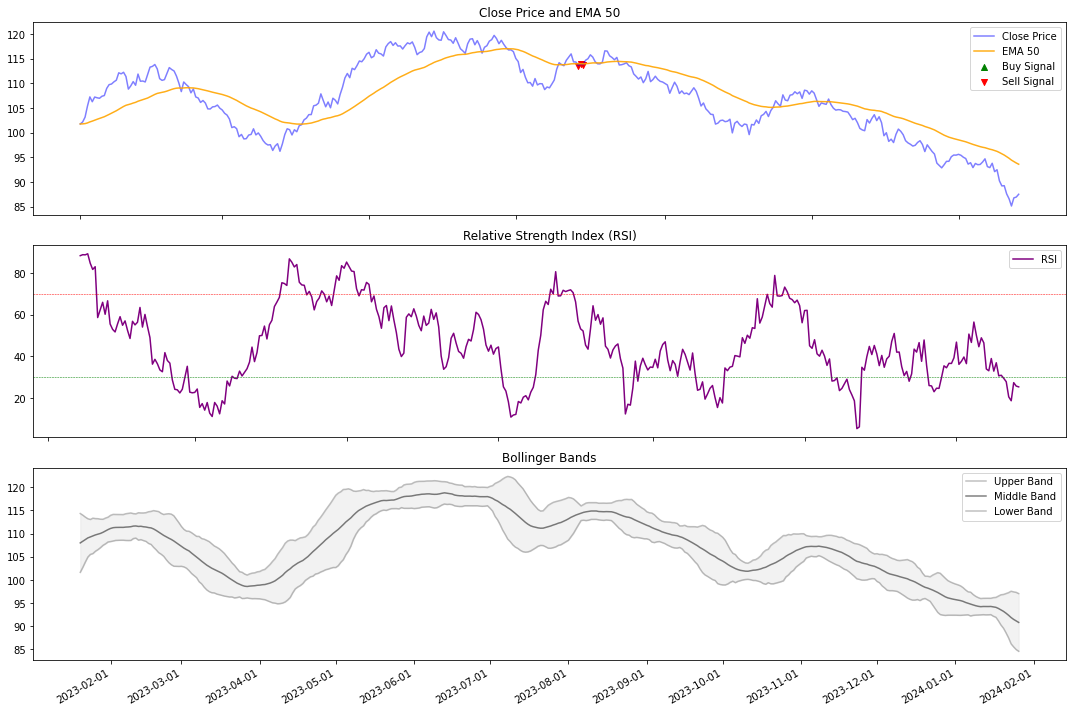

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to generate dummy historical data
def generate_dummy_data(start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    np.random.seed(0)  # For reproducibility
    price_changes = np.random.normal(0, 1, len(dates))  # Small random price changes
    prices = 100 + np.cumsum(price_changes)  # Starting price of 100 and adding up the changes
    data = pd.DataFrame({'Date': dates, 'Close': prices})
    data.set_index('Date', inplace=True)
    return data

# Technical Indicators Calculations
def calculate_ema(prices, period):
    return prices.ewm(span=period, adjust=False).mean()

def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_bollinger_bands(prices, period=20, num_std=2):
    sma = prices.rolling(window=period).mean()
    std = prices.rolling(window=period).std()
    upper_band = sma + (std * num_std)
    lower_band = sma - (std * num_std)
    return upper_band, sma, lower_band

# Generate the data from January 1, 2023 to January 26, 2024
dummy_data = generate_dummy_data('2023-01-01', '2024-01-26')

# Apply the calculations to the data
dummy_data['EMA_50'] = calculate_ema(dummy_data['Close'], 50)
dummy_data['RSI'] = calculate_rsi(dummy_data['Close'], 14)
dummy_data['Upper_Band'], dummy_data['Middle_Band'], dummy_data['Lower_Band'] = calculate_bollinger_bands(dummy_data['Close'], 20, 2)

# Generate Buy and Sell Signals
dummy_data['Signal'] = 0  # Default value, no action
buy_signal = (dummy_data['Close'] > dummy_data['EMA_50']) & (dummy_data['RSI'] < 30)
sell_signal = (dummy_data['Close'] < dummy_data['EMA_50']) & (dummy_data['RSI'] > 70)
dummy_data.loc[buy_signal, 'Signal'] = 1  # Buy signal
dummy_data.loc[sell_signal, 'Signal'] = -1  # Sell signal

# Statistical Measures
descriptive_stats = dummy_data['Close'].describe()
correlation_matrix = dummy_data[['Close', 'EMA_50', 'RSI', 'Upper_Band', 'Middle_Band', 'Lower_Band']].corr()
daily_returns = dummy_data['Close'].pct_change()
volatility = daily_returns.std()

# Data Visualization
plt.figure(figsize=(15,10))

# Plotting the closing prices and EMA
plt.subplot(311)
plt.plot(dummy_data.index, dummy_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(dummy_data.index, dummy_data['EMA_50'], label='EMA 50', color='orange', alpha=0.9)
plt.scatter(dummy_data[dummy_data['Signal'] == 1].index, dummy_data[dummy_data['Signal'] == 1]['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(dummy_data[dummy_data['Signal'] == -1].index, dummy_data[dummy_data['Signal'] == -1]['Close'], marker='v', color='red', label='Sell Signal', alpha=1)
plt.title('Close Price and EMA 50')
plt.legend()

# Plotting RSI
plt.subplot(312)
plt.plot(dummy_data.index, dummy_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', linewidth=0.5)
plt.axhline(30, color='green', linestyle='--', linewidth=0.5)
plt.title('Relative Strength Index (RSI)')
plt.legend()

# Plotting Bollinger Bands
plt.subplot(313)
plt.plot(dummy_data.index, dummy_data['Upper_Band'], label='Upper Band', color='grey', alpha=0.5)
plt.plot(dummy_data.index, dummy_data['Middle_Band'], label='Middle Band', color='black', alpha=0.5)
plt.plot(dummy_data.index, dummy_data['Lower_Band'], label='Lower Band', color='grey', alpha=0.5)
plt.fill_between(dummy_data.index, dummy_data['Upper_Band'], dummy_data['Lower_Band'], color='grey', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()

# Date Formatting
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()



### Importing Libraries:
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
```
The code begins by importing necessary libraries:
- `pandas` is used for data manipulation and analysis.
- `numpy` is for numerical computations.
- `matplotlib.pyplot` is for plotting graphs and charts.
- `matplotlib.dates` is for formatting dates on charts.

### Function to Generate Dummy Historical Data:
```python
def generate_dummy_data(start_date, end_date):
    ...
```
A function named `generate_dummy_data` is defined to create fake or "dummy" price data for a cryptocurrency between two dates (`start_date` and `end_date`). It uses a random number generator to simulate daily price changes and adds them cumulatively to a starting price of 100 to mimic the price movement.

### Technical Indicators Calculations:
Three functions are defined to calculate different technical indicators, which are tools used by traders to analyze past price patterns to forecast future price movements:
- `calculate_ema`: Calculates the Exponential Moving Average (EMA), which is a type of moving average that gives more weight to recent prices.
- `calculate_rsi`: Computes the Relative Strength Index (RSI), an oscillator that measures the speed and change of price movements. It can indicate whether an asset is overbought or oversold.
- `calculate_bollinger_bands`: Determines the Bollinger Bands, which are volatility bands placed above and below a moving average.

### Generating Data and Applying Indicators:
```python
dummy_data = generate_dummy_data('2023-01-01', '2024-01-26')
...
```
The code then calls `generate_dummy_data` to create a dataset for the given date range and applies the above indicators to this data.

### Generating Trading Signals:
```python
dummy_data['Signal'] = 0  # Default value, no action
...
```
Trading signals are generated based on certain conditions using the indicators calculated earlier. A signal to buy is indicated by `1`, and to sell by `-1`.

### Statistical Measures:
```python
descriptive_stats = dummy_data['Close'].describe()
...
```
Basic statistical measures, such as mean and standard deviation, are calculated for the closing prices. This provides a summary of the data.

### Data Visualization:
```python
plt.figure(figsize=(15,10))
...
```
The code uses Matplotlib to create several plots showing the closing prices, EMA, RSI, and Bollinger Bands. These visualizations can help in understanding the behavior of the trading strategy.

### Plot Formatting and Display:
The plot's appearance is adjusted for readability, and dates are formatted. Finally, `plt.show()` is called to display the plot.


In [ ]:
import random
import time

class SimulatedCryptoTradingBot:
    def __init__(self):
        self.balance = 1000  # USD
        self.holdings = 0  # Amount of cryptocurrency owned

    def fetch_market_data(self, symbol):
        # Simulate fetching market data by generating a random price
        simulated_price = random.uniform(10000, 60000)  # Random price between $10,000 and $60,000
        return {'last_price': simulated_price}

    def fetch_historical_data(self, symbol, period):
        # Simulate fetching historical data by generating random prices
        simulated_prices = [random.uniform(10000, 60000) for _ in range(period)]
        return pd.DataFrame({'close': simulated_prices})

    def calculate_signals(self, data):
        price = data["last_price"]
        short_window = 5
        long_window = 20
        prev_data = self.fetch_historical_data("BTC-USD", 20)  # Simulated historical data
        short_ma = prev_data["close"].rolling(window=short_window).mean().iloc[-1]
        long_ma = prev_data["close"].rolling(window=long_window).mean().iloc[-1]
        signal = "buy" if short_ma > long_ma and self.balance >= price * 0.1 else "sell" if self.holdings >= 0.1 else "hold"
        return signal

    def execute_trade(self, signal, symbol, quantity):
        price = self.fetch_market_data(symbol)['last_price']
        if signal == 'buy':
            cost = price * quantity
            self.balance -= cost  # Subtract cost from balance
            self.holdings += quantity  # Add crypto to holdings
            print(f"Bought {quantity} of {symbol} for {cost} USD.")
        elif signal == 'sell':
            revenue = price * quantity
            self.balance += revenue  # Add revenue to balance
            self.holdings -= quantity  # Subtract crypto from holdings
            print(f"Sold {quantity} of {symbol} for {revenue} USD.")
        else:
            print("Holding position.")

    def run(self):
        while True:
            try:
                symbol = "BTC-USD"
                data = self.fetch_market_data(symbol)
                signal = self.calculate_signals(data)
                self.execute_trade(signal, symbol, quantity=0.1)
            except Exception as e:
                print(f"Error occurred: {e}")
            time.sleep(60)  # Wait for 1 minute

# Run the simulated bot
bot = SimulatedCryptoTradingBot()
bot.run()


Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding position.
Holding po


### Importing Libraries
```python
import random
import time
```
Two standard Python libraries are imported:
- `random` is used to generate random numbers, which simulate the fluctuating prices of a cryptocurrency.
- `time` is used to introduce delays in the bot's operation, mimicking the passage of time between trades.

### Defining the Bot Class
```python
class SimulatedCryptoTradingBot:
    ...
```
A `class` is a blueprint for creating objects. Here, `SimulatedCryptoTradingBot` is defined as a class that simulates a trading bot's behavior.

### Initialization Method
```python
def __init__(self):
    self.balance = 1000  # USD
    self.holdings = 0  # Amount of cryptocurrency owned
```
The `__init__` method is called when a new instance of the class is created. It initializes the bot with a balance of $1000 and zero cryptocurrency holdings.

### Simulating Market Data
```python
def fetch_market_data(self, symbol):
    ...
```
This method simulates the action of fetching the current market price of a cryptocurrency by generating a random price between $10,000 and $60,000.

### Fetching Historical Data
```python
def fetch_historical_data(self, symbol, period):
    ...
```
Here, the bot generates simulated historical price data for a cryptocurrency. It creates a list of random prices, one for each day in the specified `period`.

### Calculating Trading Signals
```python
def calculate_signals(self, data):
    ...
```
This method calculates trading signals based on the current price (`last_price`) and simulated historical data. It uses a simple moving average crossover strategy where it buys if the short-term average is higher than the long-term average and the bot has enough balance. It sells if the short-term average is lower and the bot holds enough cryptocurrency. Otherwise, it holds.

### Executing Trades
```python
def execute_trade(self, signal, symbol, quantity):
    ...
```
Based on the signal generated (`buy`, `sell`, or `hold`), this method executes trades. If the signal is `buy`, it checks if there is enough balance, then purchases cryptocurrency, updating the balance and holdings accordingly. If `sell`, it sells a specified quantity of cryptocurrency if the holdings suffice. If `hold`, it does nothing.

### Running the Bot
```python
def run(self):
    ...
```
The `run` method is the main loop of the bot. It continuously fetches the current market data, calculates the trading signal, and then executes the trade. After each iteration, it waits for 60 seconds, simulating a one-minute interval between actions.

### Starting the Bot
```python
# Run the simulated bot
bot = SimulatedCryptoTradingBot()
bot.run()
```
Finally, an instance of `SimulatedCryptoTradingBot` is created, and the `run` method is called to start the simulation.

### Important Notes
- The script is intended for educational purposes and does not make real trades.
- The prices are simulated and do not reflect any real market data.
- The strategy is simplified and does not account for transaction fees, slippage, or other real-world trading factors.
- The `while True` loop in the `run` method will run indefinitely until manually stopped or an error occurs.
- In a real-world scenario, the bot should have error handling, logging, and potentially a way to exit the loop cleanly.


Sold 0.1 BTC at $49312.88
Bought 0.1 BTC at $40560.63
Sold 0.1 BTC at $18894.82
Insufficient balance to buy 0.1 BTC at $53334.41


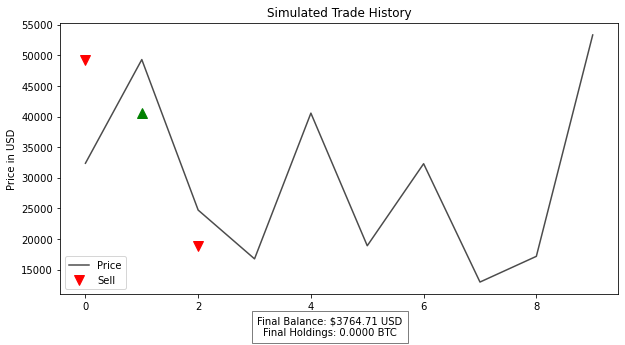

((3764.707253716514, 0.0),
    type         price  quantity
 0  sell  49312.884350       0.1
 1   buy  40560.634202       0.1
 2  sell  18894.822390       0.1)

In [6]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

class SimulatedCryptoTradingBot:
    def __init__(self, initial_balance=1000, initial_holdings=0.1):
        self.balance = initial_balance  # Starting balance in USD
        self.holdings = initial_holdings  # Starting cryptocurrency holdings, set to 0.1 BTC
        self.trade_history = []  # To record each trade
        self.price_history = []  # To keep track of price for visualization

    def fetch_market_data(self):
        # Simulate fetching market data by generating a random price with more volatility
        simulated_price = random.uniform(10000, 60000)  # Wider price range
        self.price_history.append(simulated_price)
        return {'last_price': simulated_price}

    def fetch_historical_data(self):
        # Simulate fetching historical data by generating random prices with a clear trend
        base_price = 30000
        trend = random.uniform(-100, 100)  # Random trend to ensure moving averages will cross
        simulated_prices = [base_price + trend * i for i in range(20)]
        return pd.DataFrame({'close': simulated_prices})

    def calculate_signals(self, historical_data):
        # A simple moving average crossover strategy to generate signals
        short_window = 5
        long_window = 20
        short_ma = historical_data['close'].rolling(window=short_window).mean().iloc[-1]
        long_ma = historical_data['close'].rolling(window=long_window).mean().iloc[-1]
        if short_ma > long_ma and self.balance >= historical_data['close'].iloc[-1] * 0.1:
            return 'buy'
        elif short_ma < long_ma and self.holdings > 0:
            return 'sell'
        return 'hold'

    def execute_trade(self, signal, price):
        quantity = 0.1  # Fixed trade quantity
        if signal == 'buy':
            cost = price * quantity
            if self.balance >= cost:
                self.balance -= cost
                self.holdings += quantity
                self.trade_history.append({'type': 'buy', 'price': price, 'quantity': quantity})
                print(f"Bought {quantity} BTC at ${price:.2f}")
            else:
                print(f"Insufficient balance to buy {quantity} BTC at ${price:.2f}")
        elif signal == 'sell':
            if self.holdings >= quantity:
                self.balance += price * quantity
                self.holdings -= quantity
                self.trade_history.append({'type': 'sell', 'price': price, 'quantity': quantity})
                print(f"Sold {quantity} BTC at ${price:.2f}")
            else:
                print(f"Insufficient holdings to sell {quantity} BTC at ${price:.2f}")

    def run_simulation(self, iterations=10):
        for _ in range(iterations):
            market_data = self.fetch_market_data()
            historical_data = self.fetch_historical_data()
            signal = self.calculate_signals(historical_data)
            self.execute_trade(signal, market_data['last_price'])

# Run the bot simulation
bot = SimulatedCryptoTradingBot(initial_balance=1000, initial_holdings=0.1)
bot.run_simulation(iterations=10)

# Create a DataFrame to store trade history and price history
trade_df = pd.DataFrame(bot.trade_history)
price_df = pd.DataFrame(bot.price_history, columns=['price'])

# Generate a simple candlestick-like plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the price history as a line plot
price_df['price'].plot(ax=ax, color='black', alpha=0.7, label='Price')

# Plotting the 'buy' trades in green and 'sell' trades in red
for i, trade in trade_df.iterrows():
    if trade['type'] == 'buy':
        ax.plot(i, trade['price'], 'g^', markersize=10, label='Buy' if i == 0 else "")
    elif trade['type'] == 'sell':
        ax.plot(i, trade['price'], 'rv', markersize=10, label='Sell' if i == 0 else "")

# Set labels and title
ax.set_ylabel('Price in USD')
ax.set_title('Simulated Trade History')
ax.legend()

# Display the balance and holdings after the simulation
balance_text = f'Final Balance: ${bot.balance:.2f} USD'
holdings_text = f'Final Holdings: {bot.holdings:.4f} BTC'

plt.figtext(0.5, 0.01, balance_text + "\n" + holdings_text, ha='center', fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

# Show the plot
plt.show()

# Output the final balance and holdings
(bot.balance, bot.holdings), trade_df


### Importing Libraries
```python
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
```
- `random`: Used to generate random numbers, simulating the fluctuating prices of a cryptocurrency.
- `pandas` (`pd`): A data manipulation library, perfect for handling time-series data like financial prices.
- `matplotlib.pyplot` (`plt`): A plotting library used for creating charts to visualize the data.
- `matplotlib.ticker`: Provides classes for tick locating and formatting during plotting.

### Defining the Trading Bot Class
```python
class SimulatedCryptoTradingBot:
    ...
```
A Python `class` is used to encapsulate the data and functions that belong to the trading bot. It acts as a blueprint for creating instances of a trading bot.

### Initialization
```python
def __init__(self, initial_balance=1000, initial_holdings=0.1):
    ...
```
This is the constructor method that initializes new instances of the bot. It sets up the initial USD balance and the amount of cryptocurrency the bot holds.

### Simulating Market Data
```python
def fetch_market_data(self):
    ...
```
This method simulates fetching the current price of a cryptocurrency by generating a random number within a specified range.

### Generating Historical Data
```python
def fetch_historical_data(self):
    ...
```
The bot generates simulated historical price data for a cryptocurrency. It creates a price trend by adding or subtracting a small random amount to each successive price.

### Signal Calculation
```python
def calculate_signals(self, historical_data):
    ...
```
This method computes signals to determine whether to buy, sell, or hold based on a simple moving average (MA) strategy. If the short-term MA is above the long-term MA and the bot has enough balance, it signals a 'buy'. If the short-term MA is below and the bot has cryptocurrency holdings, it signals a 'sell'. Otherwise, it signals to 'hold'.

### Trade Execution
```python
def execute_trade(self, signal, price):
    ...
```
When the bot has a signal to buy or sell, this method executes the trade by updating the bot's balance and holdings. It prints the action taken to the console for transparency.

### Simulation Run
```python
def run_simulation(self, iterations=10):
    ...
```
This method simulates real-time bot operation for a given number of iterations, where each iteration represents a time step (e.g., a minute or a day).

### Running the Bot
```python
bot = SimulatedCryptoTradingBot(initial_balance=1000, initial_holdings=0.1)
bot.run_simulation(iterations=10)
```
An instance of the trading bot is created with a starting balance and holdings. The `run_simulation` method is called to start the trading simulation for 10 iterations.

### Data Visualization
The code following the bot's execution is for visualizing the results of the simulation:
- It creates a DataFrame of the trade history.
- It plots the simulated price history and marks the points where the bot decided to buy (green triangle) or sell (red inverted triangle).
- It annotates the final balance and holdings after the simulation is completed.
- Finally, the plot is displayed with `plt.show()`.

The output of the script shows the final balance and holdings of the bot, along with a DataFrame summarizing the trades made during the simulation.

